 # 1. General Data Exploration

###  Dataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00294/CCPP.zip"
import zipfile, io, requests
r = requests.get(url)
with zipfile.ZipFile(io.BytesIO(r.content)) as z:
    with z.open("CCPP/Folds5x2_pp.xlsx") as f:
        df = pd.read_excel(f)

In [3]:
df 

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


### Q. What are the basic details of the dataset? (rows, columns, data types)

In [4]:
df.shape 

(9568, 5)

 Insight: There is 9568 rows and 5 columns.

In [5]:
df.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

In [6]:
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [7]:
df.columns = ['Temperature', 'Exhaust_Vacuum', 'Ambient_Pressure', 'Relative_Humidity', 'Energy_Output']
list(df.columns)

['Temperature',
 'Exhaust_Vacuum',
 'Ambient_Pressure',
 'Relative_Humidity',
 'Energy_Output']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        9568 non-null   float64
 1   Exhaust_Vacuum     9568 non-null   float64
 2   Ambient_Pressure   9568 non-null   float64
 3   Relative_Humidity  9568 non-null   float64
 4   Energy_Output      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


#### Q .Which features contain missing values, and what percentage is missing?

In [9]:
missing_values = df.isnull().sum()

In [10]:
missing_percentage = (missing_values / len(df)) * 100

In [11]:
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})

In [12]:
missing_data

,Missing Values,Missing Percentage
Temperature,0,0.0
Exhaust_Vacuum,0,0.0
Ambient_Pressure,0,0.0
Relative_Humidity,0,0.0
Energy_Output,0,0.0


Insight: There are no missing values the data set is clean.

#### Q. What are the summary statistics for numerical features?

In [13]:
df.describe()

,Temperature,Exhaust_Vacuum,Ambient_Pressure,Relative_Humidity,Energy_Output
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [14]:
df.skew

<bound method DataFrame.skew of       Temperature  Exhaust_Vacuum  Ambient_Pressure  Relative_Humidity  \
0           14.96           41.76           1024.07              73.17   
1           25.18           62.96           1020.04              59.08   
2            5.11           39.40           1012.16              92.14   
3           20.86           57.32           1010.24              76.64   
4           10.82           37.50           1009.23              96.62   
...           ...             ...               ...                ...   
9563        16.65           49.69           1014.01              91.00   
9564        13.19           39.18           1023.67              66.78   
9565        31.32           74.33           1012.92              36.48   
9566        24.48           69.45           1013.86              62.39   
9567        21.60           62.52           1017.23              67.87   

      Energy_Output  
0            463.26  
1            444.37  
2            

In [15]:
categorical_features = df.select_dtypes(include=['float64']).columns

for col in categorical_features:
    print(f"{col}: {df[col].nunique()} unique values")

Temperature: 2773 unique values
Exhaust_Vacuum: 634 unique values
Ambient_Pressure: 2517 unique values
Relative_Humidity: 4546 unique values
Energy_Output: 4836 unique values


### Q. What can we infer from the distribution of individual features?

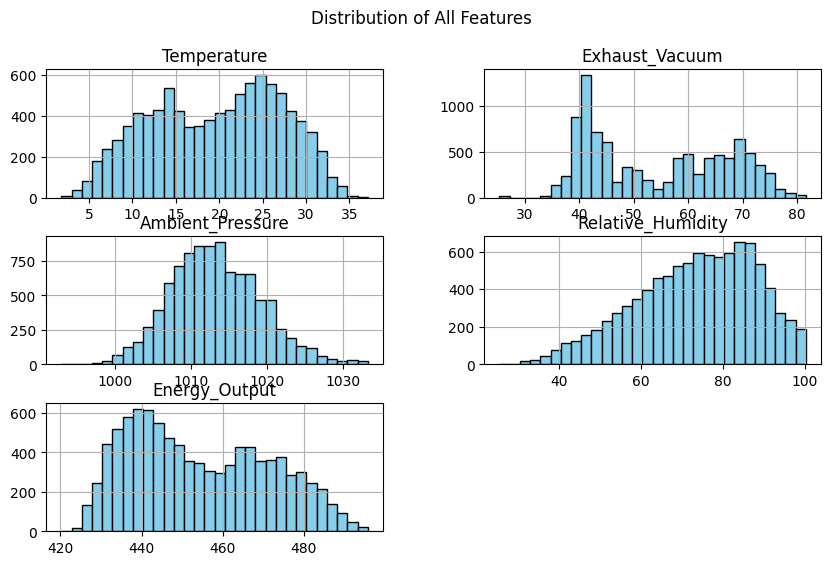

In [16]:
df.hist(figsize=(10, 6), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of All Features")
plt.show()

### Insight:
•Temperature shows two peaks — possibly due to seasonal variation.<br>
•Exhaust Vacuum has multiple peaks, which suggest different operating conditions.<br>
•Ambient Pressure nicely bell-shaped.<br>
•Relative Humidity skewed toward higher values.<br>
•Energy Output slightly bimodal which hints varying load or production levels.<br>

##  Correlation Heatmap

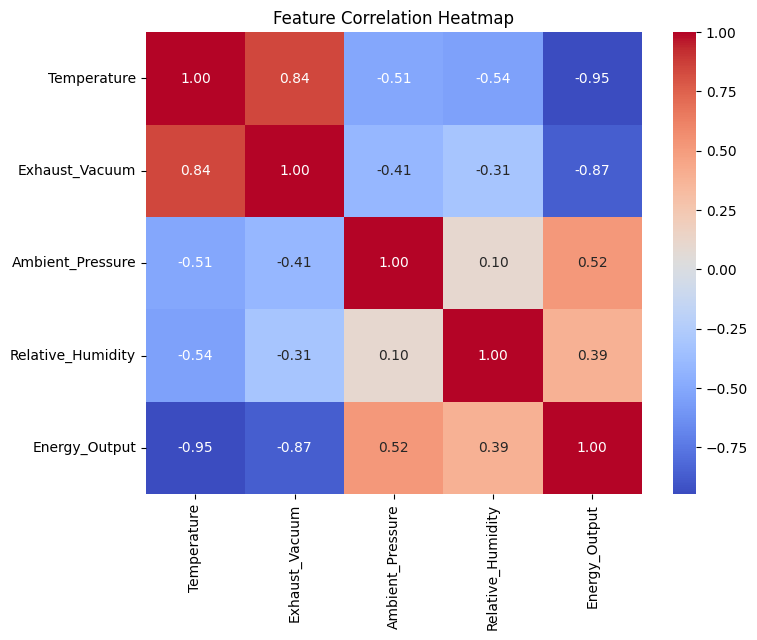

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

### Insight:
•Temperature and Exhaust Vacuum have a strong positive correlation, and both show a strong negative correlation with Energy       Output, indicating they  significantly impact power generation.<br>
•Ambient Pressure and Relative Humidity have weaker but positive correlations with Energy Output, suggesting a secondary influence on output.

### ❓ What can we explore further from this heatmap?

#### How Energy_Output changes across different ranges of Temperature?

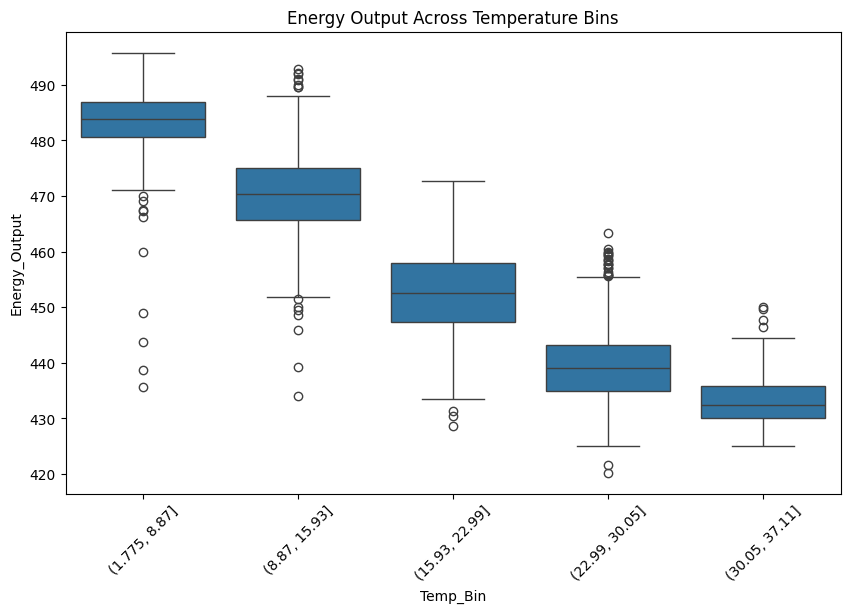

In [19]:
df['Temp_Bin'] = pd.cut(df['Temperature'], bins=5)
plt.figure(figsize=(10,6))
sns.boxplot(x='Temp_Bin', y='Energy_Output', data=df)
plt.xticks(rotation=45)
plt.title("Energy Output Across Temperature Bins")
plt.show()

###  Insights from the Boxplot

- Energy output decreases as temperature increases — confirming the negative impact of heat.
- Lower variance at high temperatures — the output is more stable but consistently lower.
- There appears to be a performance threshold around the mid-temperature bin, where output drops steeply.
- Some outliers suggest there are rare conditions where the plant performs better or worse than typical in that bin.


#### Bivariate Analysis: How Do Independent Variables Affect Energy Output?

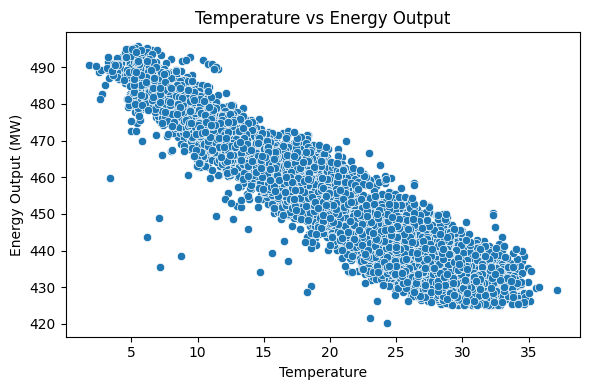

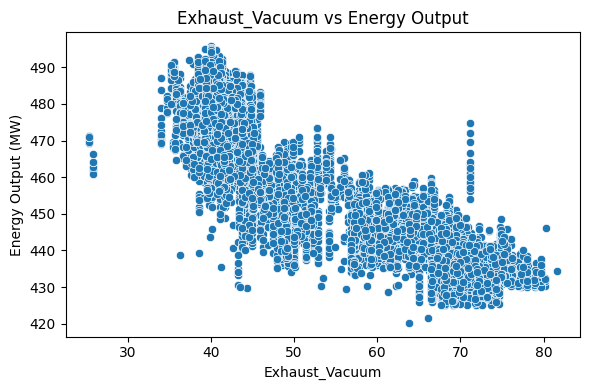

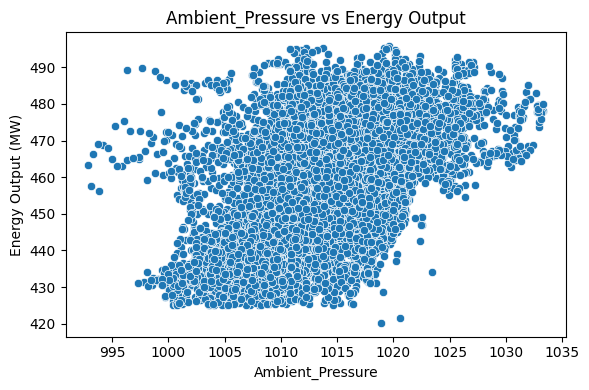

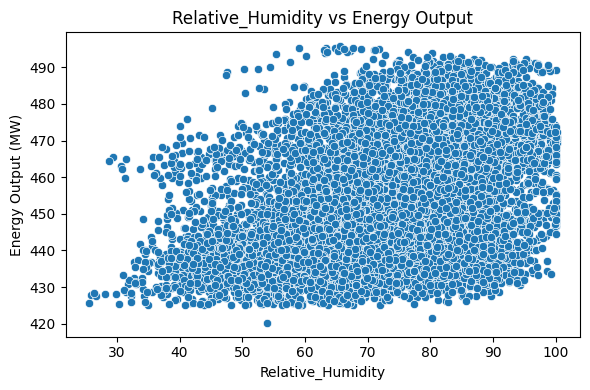

In [18]:
features = ['Temperature', 'Exhaust_Vacuum', 'Ambient_Pressure', 'Relative_Humidity']
for col in features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df['Energy_Output'])
    plt.title(f"{col} vs Energy Output")
    plt.xlabel(col)
    plt.ylabel("Energy Output (MW)")
    plt.tight_layout()
    plt.show()

###  Insights from Scatter Plots

•Temperature shows a strong negative linear relationship with Energy_Output. As temperature increases, energy output decreases significantly — likely due to reduced air density affecting turbine efficiency.
  
•Exhaust Vacuum has a moderate inverse and slightly non-linear relationship with Energy_Output. Higher vacuum levels may indicate operational inefficiencies or load conditions impacting output.

•Ambient Pressure displays a mild positive linear trend. Increased pressure leads to slightly higher energy output, likely due to improved combustion efficiency with denser air.

•Relative Humidity reveals a weak negative relationship. High humidity might slightly reduce power output, possibly due to reduced oxygen concentration, but its effect is minor compared to temperature.


###  Pairplot Analysis: Exploring Pairwise Feature Relationship

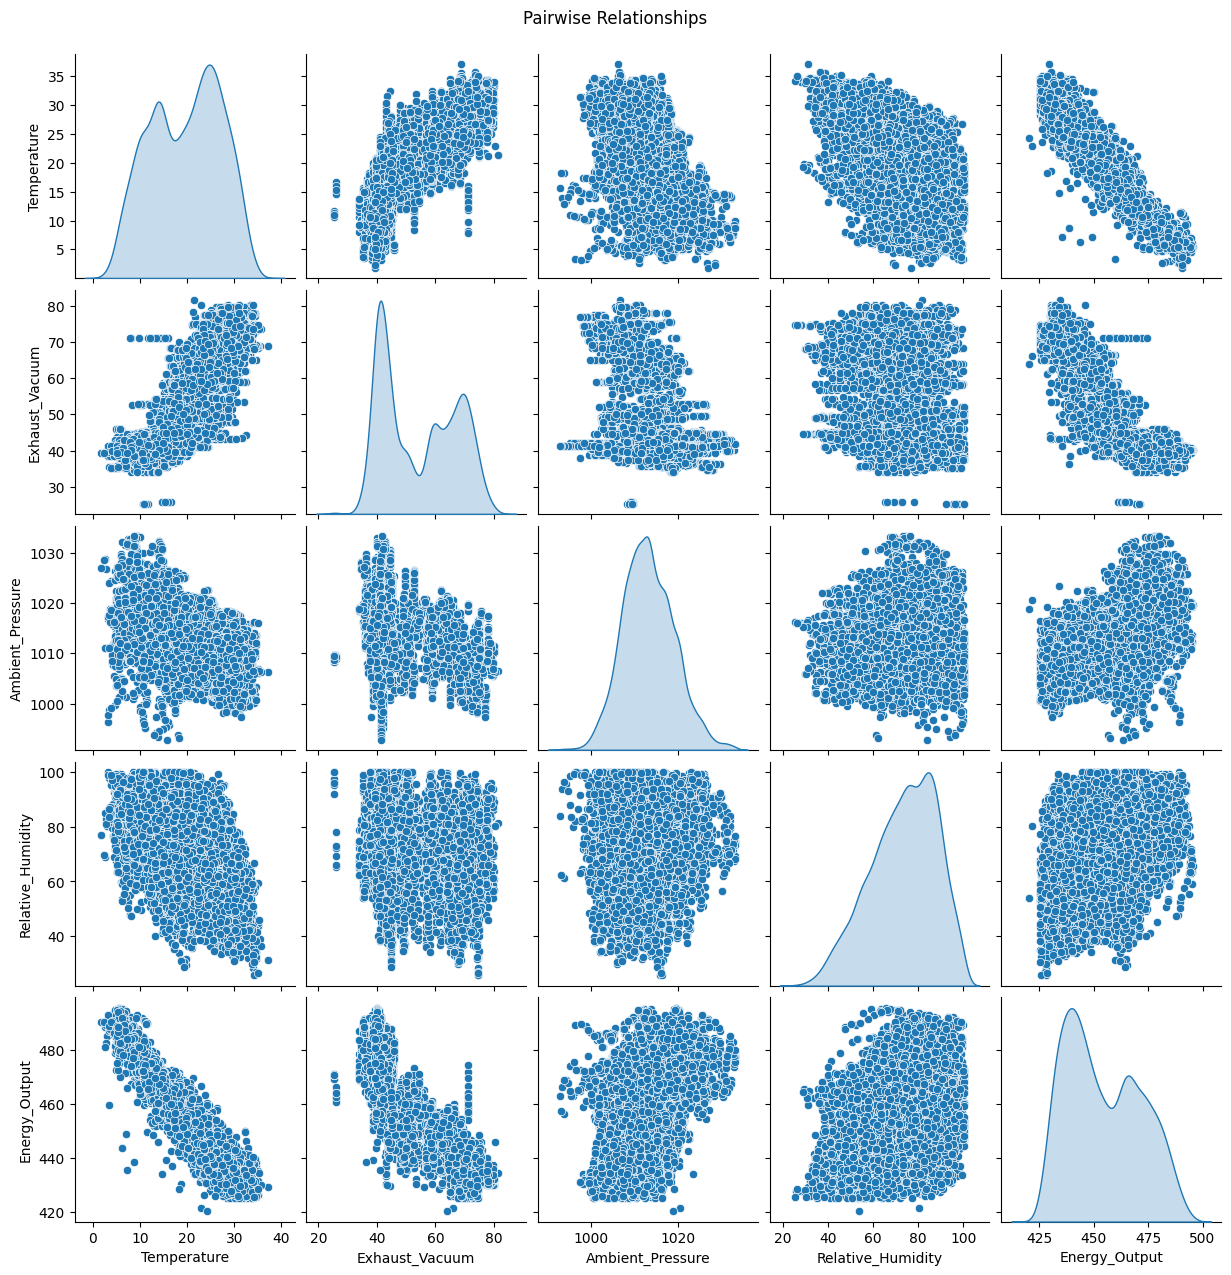

In [20]:
sns.pairplot(df[['Temperature', 'Exhaust_Vacuum', 'Ambient_Pressure', 'Relative_Humidity', 'Energy_Output']], diag_kind='kde')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()